<a href="https://www.kaggle.com/code/ardahanaytan/veri-analizi-bootcamp?scriptVersionId=209223844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **0. Projeyi Hazırlayanlar**

### 1.  Ardahan Aytan -- github.com/ardahanaytan
### 2.  Yağmur Aktaş -- github.com/yamuraktas

# **1. Veri Setinin Hazırlanması**

In [1]:
import numpy as np
import pandas as pd
# Pandas ve numpy kütüphanelerini yükleyerek başlıyoruz.

import matplotlib.pyplot as plt
import seaborn as sns 
# Görselleştirme kütüphaneleri

In [2]:
df_ = pd.read_excel('/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx')
#df = df_.copy()
# Data setimizi kullanılabilir formata soktuk.

In [3]:
df = df_.copy()
# Bir hata yaptığımda pd.read_excel kodunu tekrar çalıştırdığı için çok uzun sürüyordu.
# O yüzden copy kısmını buraya aldım.

In [4]:
#Veri setimize null değerler ekliyoruz

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)
    

# **2. Veri Setinin İncelenmesi**

In [5]:
df.head()
# Data setimizi inceliyoruz.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df.tail()
# transaction_id ve indeximizin aynı doğrultuda gidip gitmediğini kontrol ettik.
# Gitmediğini gördük.
# İlerde indeximi transaction_date ve transaction_time sütunlarından oluşturabileceğimizi düşündük.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,NaN,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456.0,2023-06-30,20:57:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup


In [7]:
df.info()
# Veri setimize ait yapısal bilgileri incelemek istedik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_date  144627 non-null  datetime64[ns]
 2   transaction_time  144697 non-null  object        
 3   transaction_qty   144763 non-null  float64       
 4   store_id          144721 non-null  float64       
 5   store_location    144833 non-null  object        
 6   product_id        144657 non-null  float64       
 7   unit_price        144644 non-null  float64       
 8   product_category  144855 non-null  object        
 9   product_type      144700 non-null  object        
 10  product_detail    144614 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 12.5+ MB


# **3. Eksik Veri Analizi**

Veri setimizi inceledik ve  ilk olarak transaction_date ile transaction_time sütunlarını birleştirerek index haline getirmeye karar verdik. transaction_time sütunumuzun datetime yerine object tipinde olduğunu gördük. Aynı zamanda sütunlardaki null değerlerin de acilen düzeltilmesi gerektiğini anladık.

In [8]:
df['transaction_date'] = df['transaction_date'].fillna(method='ffill')
df['transaction_date'].isna().sum()
# transaction_date sütununu incelemiştik ve kronolojik sırayla ilerlediğini görmüştük. 
# Bu yüzden null değerleri bir önceki değer ile doldurduk.

/tmp/ipykernel_17/4213351654.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['transaction_date'] = df['transaction_date'].fillna(method='ffill')


0

In [9]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce')
df['transaction_time']= df['transaction_time'].fillna(method='ffill') + pd.to_timedelta(df['transaction_time'].isna().cumsum(), unit='m')
df['transaction_time'].isna().sum()
# transaction_time sütununu incelemiştik ve kronolojik sırayla ilerlediğini görmüştük.
# Bu yüzden null değerleri bir önceki değerden 1 dk fazla olacak şekilde doldurduk.
# cumsum() ile sırasını belirlediğimiz null değerlere 1'er dk ekledik.

/tmp/ipykernel_17/3931082406.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['transaction_time']= df['transaction_time'].fillna(method='ffill') + pd.to_timedelta(df['transaction_time'].isna().cumsum(), unit='m')


0

In [10]:
df['zaman'] = df['transaction_date'] + pd.to_timedelta(df['transaction_time'].dt.time.astype(str))
df.tail()
# transaction_date ve transaction_time sütunlarını birleştirdik.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,zaman
149111,149452.0,2023-06-30,1900-01-04 21:56:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30 21:56:41
149112,149453.0,2023-06-30,1900-01-04 21:57:41,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30 21:57:41
149113,149454.0,2023-06-30,1900-01-04 22:10:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30 22:10:34
149114,149455.0,2023-06-30,1900-01-04 22:36:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 22:36:19
149115,149456.0,2023-06-30,1900-01-04 22:36:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup,2023-06-30 22:36:19


In [11]:
df.drop(columns=['transaction_date', 'transaction_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_qty   144763 non-null  float64       
 2   store_id          144721 non-null  float64       
 3   store_location    144833 non-null  object        
 4   product_id        144657 non-null  float64       
 5   unit_price        144644 non-null  float64       
 6   product_category  144855 non-null  object        
 7   product_type      144700 non-null  object        
 8   product_detail    144614 non-null  object        
 9   zaman             149116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 11.4+ MB


In [12]:
df.set_index('zaman', inplace = True)
# Zaman sütununu datetime index olarak ayarladık.

In [13]:
df.drop(columns=['transaction_id', 'store_id', 'product_id'], inplace=True)
# transaction_id sadece sipariş numarası tuttuğu için veri analizinde kullanmayacağız.
# store_location ile store_id / product_type ile product_id aynı değerleri gösterdikleri için id değerlerine ihtiyacımız olmadığını düşündük.

In [14]:
#!pip install missingno

import missingno as msno

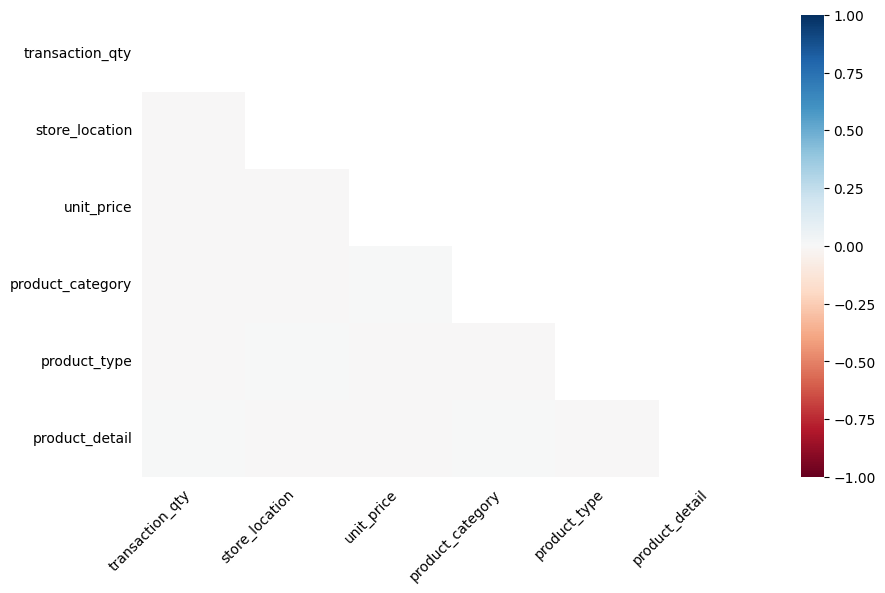

In [15]:
msno.heatmap(df = df,
            figsize = (10,6),
             fontsize = 10 );

#Özellikler arası ilişki kontolü için heatmap oluşturduk.

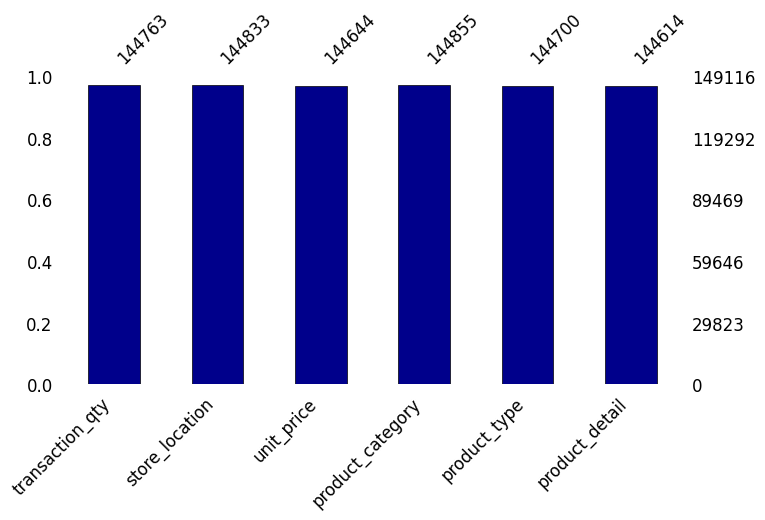

In [16]:
ax = msno.bar ( df= df,
         
        figsize =(8,4),
         fontsize= 12);

# Renklendirme 
for bar in ax.patches:
    bar.set_color('#00008B')  
    bar.set_edgecolor('black')  
    bar.set_linewidth(0.5)  

plt.show()

#Eğitimde gördüğümüz için denemek istedik :)

In [17]:
df.head(50)

,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
zaman,,,,,,
2023-01-01 07:06:11,2.0,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
2023-01-01 07:08:56,2.0,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2023-01-01 07:14:04,2.0,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
2023-01-01 07:20:24,1.0,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2023-01-01 07:22:41,2.0,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2023-01-01 07:22:41,1.0,Lower Manhattan,3.00,Bakery,Scone,Oatmeal Scone
2023-01-01 07:25:49,1.0,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2023-01-01 07:33:34,2.0,Lower Manhattan,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
2023-01-01 07:39:13,1.0,Lower Manhattan,4.25,Coffee,Barista Espresso,Latte Rg


In [18]:
df[df['product_category'].isna()&df['product_type'].isna()]
# Hem product_category hem de product_type değerleri null olan 101 tane veri satırına eriştik ve
# bunlara rastgele değerler atamak istemediğimiz için bu veri satırlarını silmeye karar verdik.

df.drop(df[df['product_category'].isna()&df['product_type'].isna()].index, inplace = True)

In [19]:
df[df['product_type'].isna()]
#product_type değerleri null olanlara rastgele değer atamak istemediğimiz için bu verileri de siliyoruz.
df.drop(df[df['product_type'].isna()].index, inplace = True)

In [20]:
boslar = df['product_category'].isnull()

df.loc[boslar & df['product_type'].isin(['Gourmet brewed coffee', 'Barista Espresso', 'Drip coffee', 'Organic brewed coffee', 'Premium brewed coffee']), 'product_category'] = 'Coffee'
df.loc[boslar & df['product_type'].isin(['Brewed Chai tea', 'Brewed Black tea', 'Brewed herbal tea', 'Brewed Green tea']), 'product_category'] = 'Tea'
df.loc[boslar & df['product_type'].isin(['Scone', 'Pastry', 'Biscotti']), 'product_category'] = 'Bakery'
df.loc[boslar & df['product_type'].isin(['Hot chocolate']), 'product_category'] = 'Drinking Chocolate'
df.loc[boslar & df['product_type'].isin(['Regular syrup', 'Sugar free syrup']), 'product_category'] = 'Flavours'
df.loc[boslar & df['product_type'].isin(['Organic Beans', 'Gourmet Beans', 'Premium Beans', 'Espresso Beans', 'House blend Beans', 'Green beans']), 'product_category'] = 'Coffee beans'
df.loc[boslar & df['product_type'].isin(['Chai tea', 'Black tea', 'Herbal tea', 'Green tea']), 'product_category'] = 'Loose Tea'
df.loc[boslar & df['product_type'].isin(['Housewares', 'Clothing']), 'product_category'] = 'Branded'
df.loc[boslar & df['product_type'].isin(['Drinking Chocolate', 'Organic Chocolate']), 'product_category'] = 'Packaged Chocolate'

# product_category sütununun boş değerlerini product_type sütunundaki değerlere göre doldurduk.

In [21]:
df['store_location'] = df['store_location'].fillna(method = 'ffill')
df['store_location'].isnull().sum()
# store_location null olanlar için satırları direkt silmek yerine bir üst satırdaki değeri yazdık.

/tmp/ipykernel_17/1763326671.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['store_location'] = df['store_location'].fillna(method = 'ffill')


0

In [22]:
df['transaction_qty'].mean() #-> 1.4398680258750145
df['transaction_qty'] = df['transaction_qty'].fillna(1.0)
df['transaction_qty'].mean() #-> 1.4270214958052692
df['transaction_qty'].isnull().sum()
# Ortalamasını en yakın değere yuvarlayarak bu değeri null değerler yerine yazdık. Ortalama arasında da 0.012'lik oynama oldu.

0

In [23]:
df['unit_price'].mean() #-> 3.3774125884231596
df['unit_price'] = df['unit_price'].fillna(3.50)
df['unit_price'].mean() #-> 3.3810916112392153
df['unit_price'].isnull().sum()
# Ortalamasını en yakın değere yuvarlayarak bu değeri null değerler yerine yazdık. Ortalama arasında da 0.004'lik oynama oldu.

0

In [24]:
df.drop(columns=['product_detail'], inplace=True)
df.isnull().sum()
# product_detail değerlerinde null olanlara doğru atama yapamayacağımız için silmeye karar verdik.
# Böylece veri setimizde null değerleri tamamen düzenledik.

transaction_qty     0
store_location      0
unit_price          0
product_category    0
product_type        0
dtype: int64

# **4. Veri Analizi, Görselleştirme ve Çıkarım Yapma**

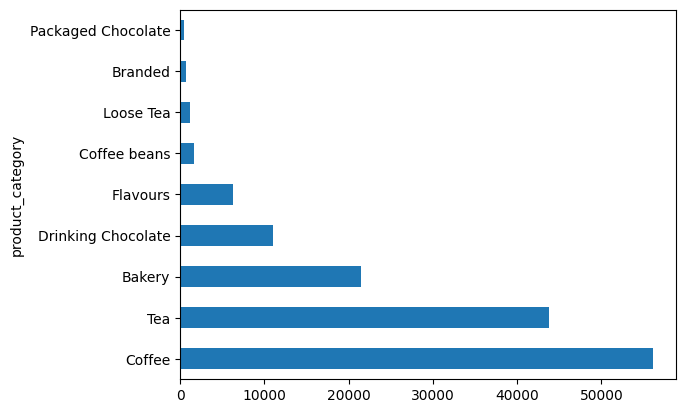

In [25]:
df['product_category'].value_counts().plot.barh();

Genel olarak kahvenin daha çok tüketildiği bir konumda olduğunu gördük.

In [26]:
df['time_range'] = pd.cut(
    df.index.hour,
    bins=[0, 12, 17, 24],  # Zaman aralıklarını tanımla
    labels=['7-12', '12-17', '17-24'],
)
# Zaman aralıklarına göre incelemek için bir sütun oluştur

/tmp/ipykernel_17/707063802.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_zaman = coffee_df.groupby('time_range')['product_category'].count()


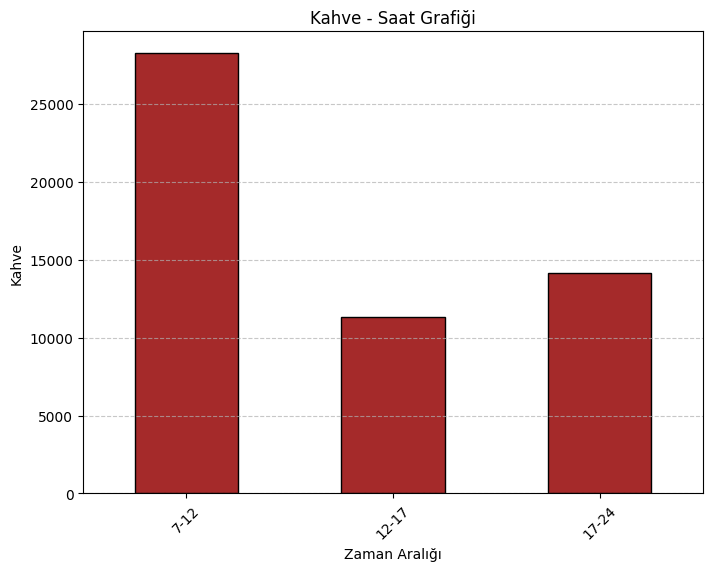

In [27]:
coffee_df = df[df['product_category'] == 'Coffee']

coffee_zaman = coffee_df.groupby('time_range')['product_category'].count()

# Grafik oluştur
plt.figure(figsize=(8, 6))
coffee_zaman.plot(kind='bar', color='brown', edgecolor='black')

plt.title("Kahve - Saat Grafiği")
plt.xlabel("Zaman Aralığı")
plt.ylabel("Kahve")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Sabah 7 ile 12 arası kahvenin daha çok tüketildiğini gördük. Bu da bize kafelerin bulunduğu konumun iş yerlerine yakın olabileceğini düşündürttü. İnsanlar işe gitmeden önce enerji ihtiyacını karşılamak amacıyla bir kahve alışverişinde bulunmuş olabilir.
Saat 12-17 arasında kahve tüketimi sabah saatlerine göre azalmaktadır. Bu, öğle saatlerinde kahve tüketiminin sabah kadar popüler olmadığını ama yine de belirli bir seviyede devam ettiğini göstermektedir.
Saat 17-24 arasında kahve tüketimi, öğlen saatleriyle benzer bir seviyededir. Bu, akşam saatlerinde kahve içenlerin genelde daha uzun süre çalışmak isteyenler ya da keyfi tüketim yapanlar olabileceğini işaret eder.

ÖNERİ:
Akşam Saatlerinde Etkinlik; akşam saatlerinde kahve tüketimini artırmak için sıcak içeceklerle birlikte tatlı veya atıştırmalık promosyonları yapılabilir.

In [28]:
df['transaction_qty'].describe()

count    142679.000000
mean          1.427021
std           0.539889
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: transaction_qty, dtype: float64

Bu verilere göre müşterilerin büyük bir kısmı, kahve dükkanlarına geldiklerinde sadece 1 ürün sipariş ediyor. Bu, kahve dükkanının "hızlı ve tekli tüketim" odaklı bir yapıya sahip olduğunu gösteriyor.
Bir grup müşteri ise 2 ürün sipariş ediyor; bu genelde kahve ile atıştırmalık kombinasyonu olabileceğini düşündürüyor.
Çok az bir kısım müşteri 3'ten fazla ürün alıyor, bu da toplu siparişlerin nadir olduğunu gösteriyor.

ÖNERİ:
Tek ürün alan müşterileri daha fazla sipariş vermeye teşvik etmek için bir promosyon programı başlatabilirsiniz. Örneğin:
"Her 5 kahve alımında bir kahve bedava."
"2 veya daha fazla ürün alana ekstra puan kazandırın." 
Bu şekilde insanları daha çok kahve alımına teşvik edebiliriz.

In [29]:
df.head()

,transaction_qty,store_location,unit_price,product_category,product_type,time_range
zaman,,,,,,
2023-01-01 07:06:11,2.0,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,7-12
2023-01-01 07:08:56,2.0,Lower Manhattan,3.1,Tea,Brewed Chai tea,7-12
2023-01-01 07:14:04,2.0,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,7-12
2023-01-01 07:20:24,1.0,Lower Manhattan,2.0,Coffee,Drip coffee,7-12
2023-01-01 07:22:41,2.0,Lower Manhattan,3.1,Tea,Brewed Chai tea,7-12


In [30]:
total_counts = df.groupby(['store_location', 'product_category']).size().reset_index(name='quantity')
total_counts 

,store_location,product_category,quantity
0,Astoria,Bakery,6868
1,Astoria,Branded,268
2,Astoria,Coffee,19298
3,Astoria,Coffee beans,477
4,Astoria,Drinking Chocolate,4137
5,Astoria,Flavours,1388
6,Astoria,Loose Tea,319
7,Astoria,Packaged Chocolate,105
8,Astoria,Tea,15713
9,Hell's Kitchen,Bakery,7158


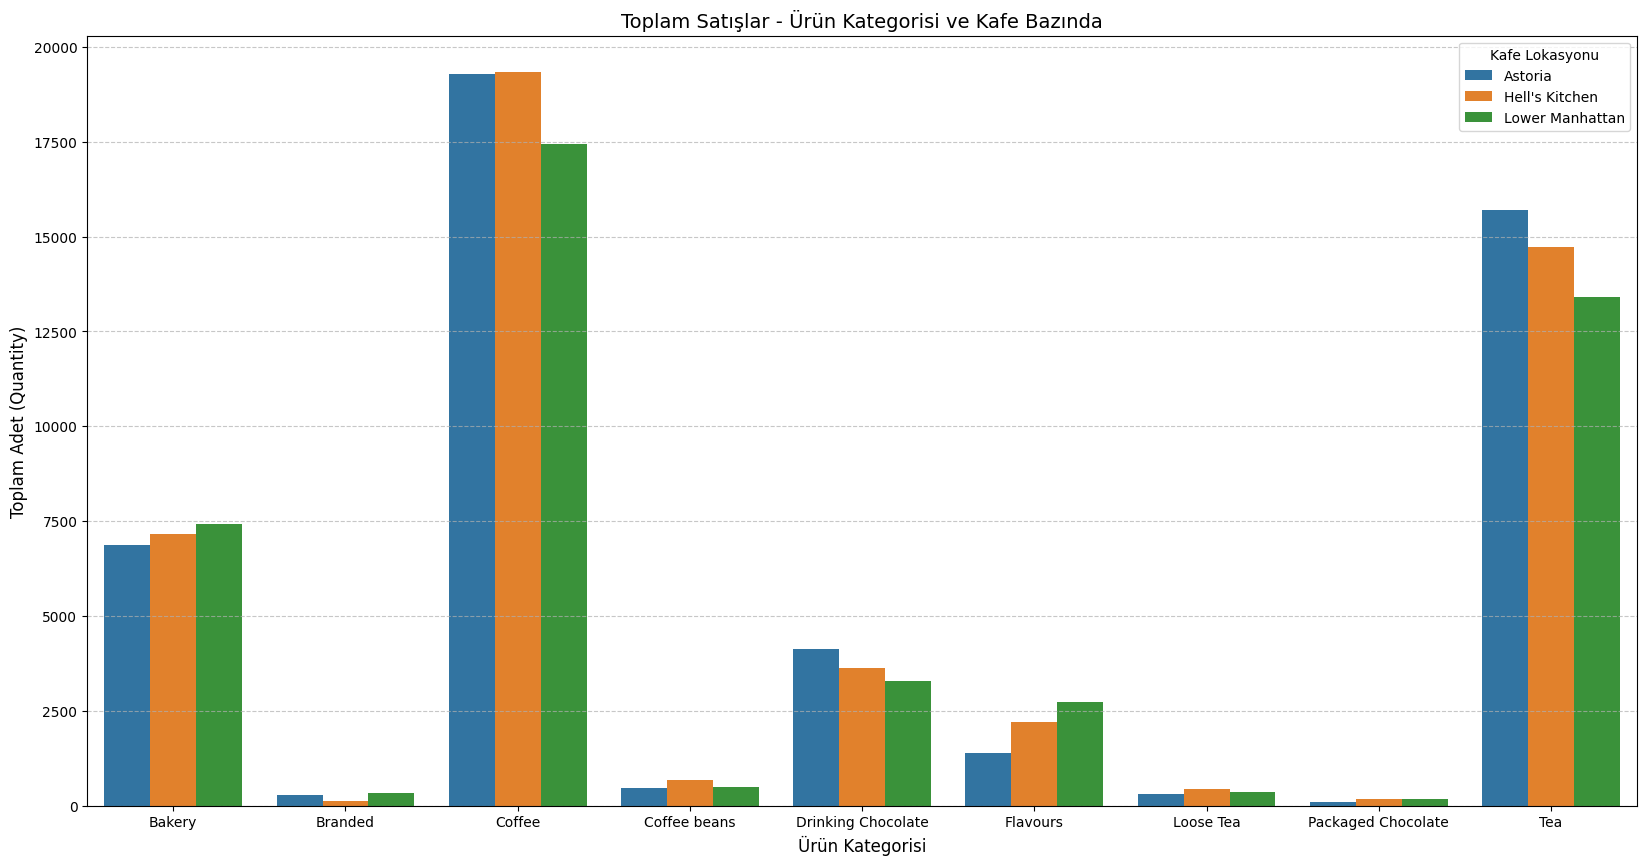

In [31]:
plt.figure(figsize=(20, 10))
sns.barplot(data=total_counts, x='product_category', y='quantity', hue='store_location')

plt.title("Toplam Satışlar - Ürün Kategorisi ve Kafe Bazında", fontsize=14)
plt.xlabel("Ürün Kategorisi", fontsize=12)
plt.ylabel("Toplam Adet (Quantity)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Kafe Lokasyonu")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

En Popüler Ürünler:

Coffee (Kahve) ve Tea (Çay) en çok tüketilen ürün kategorileri. Tüm kafe lokasyonlarında bu kategorilerde yüksek satış miktarları dikkat çekiyor.
Özellikle Coffee kategorisi, Astoria ve Hell's Kitchen'da diğer kategorilere kıyasla en çok satılan ürün olarak öne çıkıyor.

Bakery (Fırın Ürünleri):
Bakery kategorisi, üç lokasyonda da dengeli bir satış performansı sergiliyor. Ancak Coffee ve Tea kadar yüksek değil.
Bu, müşterilerin genellikle kahve veya çay ile birlikte bir fırın ürünü alabileceği fikrini destekliyor.

Branded ve Loose Tea Ürünleri:
Branded (Markalı Ürünler) ve Loose Tea (Açık Çay) kategorilerinde satışlar oldukça düşük. Bu, bu ürünlere yönelik talebin sınırlı olduğunu gösteriyor.
Bu kategoriler için yeni stratejiler geliştirilmesi veya bu ürünlerin stok ve satış yönetiminde maliyetin azaltılması düşünülebilir.

Drinking Chocolate ve Flavours:
Drinking Chocolate kategorisi, Astoria'da diğer lokasyonlara göre daha yüksek satış gösteriyor, ancak Hell's Kitchen ve Lower Manhattan'da bu kategori daha az tercih edilmiş.
Flavours kategorisi ise Lower Manhattan'da biraz daha fazla satılıyor, ancak genel olarak diğer kategorilere kıyasla düşük satış rakamlarına sahip.

Coffee Beans ve Packaged Chocolate:
Coffee Beans (Kahve Çekirdekleri) ve Packaged Chocolate kategorilerinin satışları oldukça düşük. Bu durum, bu ürünlerin sınırlı bir müşteri kitlesine hitap ettiğini veya tanıtım eksikliğinden dolayı yeterince talep görmediğini düşündürüyor.
